In [1]:
# load the necessary modules

using Jecco, Jecco.AdS5_3_1
using PyPlot
using HDF5
using LaTeXStrings

pygui(false)

false

In [2]:
# give the directories of the data
# coarse resolution is dir16
# medium resolution is dir32
# fine resolution is dir64

dir = "./"

dir16 = dir*"t10_Nx16"
dir32 = dir*"t10_Nx32"
dir64  = dir*"t10_Nx64"


"./t10_Nx64"

In [3]:
# load the data
# this numerical configuration has 1 inner and 3 outer grids
# which are labelled as c1, c2, c3, c4 respectively

xi_t_16   = XiTimeSeries(dir16);
xi_t_32   = XiTimeSeries(dir32);
xi_t_64   = XiTimeSeries(dir64);

A_t_16_c1   = ConstrainedTimeSeries(dir16, :A, 1);
A_t_32_c1   = ConstrainedTimeSeries(dir32, :A, 1);
A_t_64_c1   = ConstrainedTimeSeries(dir64, :A, 1);

A_t_16_c2   = ConstrainedTimeSeries(dir16, :A, 2);
A_t_32_c2   = ConstrainedTimeSeries(dir32, :A, 2);
A_t_64_c2   = ConstrainedTimeSeries(dir64, :A, 2);

A_t_16_c3   = ConstrainedTimeSeries(dir16, :A, 3);
A_t_32_c3   = ConstrainedTimeSeries(dir32, :A, 3);
A_t_64_c3   = ConstrainedTimeSeries(dir64, :A, 3);

A_t_16_c4   = ConstrainedTimeSeries(dir16, :A, 4);
A_t_32_c4   = ConstrainedTimeSeries(dir32, :A, 4);
A_t_64_c4   = ConstrainedTimeSeries(dir64, :A, 4);

# load the time and spatial discretizations of the different resolutions

tt_16, uu_16_c1, xx_16, yy_16    = get_coords(A_t_16_c1, :, :, :, :);
tt_32, uu_32_c1, xx_32, yy_32    = get_coords(A_t_32_c1, :, :, :, :);
tt_64, uu_64_c1, xx_64, yy_64    = get_coords(A_t_64_c1, :, :, :, :);

tt_16, uu_16_c2, xx_16, yy_16    = get_coords(A_t_16_c2, :, :, :, :);
tt_32, uu_32_c2, xx_32, yy_32    = get_coords(A_t_32_c2, :, :, :, :);
tt_64, uu_64_c2, xx_64, yy_64    = get_coords(A_t_64_c2, :, :, :, :);

tt_16, uu_16_c3, xx_16, yy_16    = get_coords(A_t_16_c3, :, :, :, :);
tt_32, uu_32_c3, xx_32, yy_32    = get_coords(A_t_32_c3, :, :, :, :);
tt_64, uu_64_c3, xx_64, yy_64    = get_coords(A_t_64_c3, :, :, :, :);

tt_16, uu_16_c4, xx_16, yy_16    = get_coords(A_t_16_c4, :, :, :, :);
tt_32, uu_32_c4, xx_32, yy_32    = get_coords(A_t_32_c4, :, :, :, :);
tt_64, uu_64_c4, xx_64, yy_64    = get_coords(A_t_64_c4, :, :, :, :);

In [5]:
# calculate the convergence factor Q for finite difference order used

hx_16 = xx_16[2]-xx_16[1];
hx_32 = xx_32[2]-xx_32[1];
hx_64 = xx_64[2]-xx_64[1];

ord = 2
(hx_16^ord - hx_32^ord)/(hx_32^ord-hx_64^ord)

4.0

In [6]:
# give the exact solution for the function xi
# vx is the advection velocity specified in the initial data
# amp is the amplitude of the perturbation of xi

vx=1.0;
amp=0.1;

xi_exact = zeros(length(tt_16),length(xx_16),length(yy_16),1);

for i in 1:length(tt_16)
    for j in 1:length(xx_16)

        tt = tt_16[i];
        xx = xx_16[j];
        xi_exact[i,j,:,1] .= amp*sin(0.2*π*(5.0 + vx*tt - xx));
        
    end
end

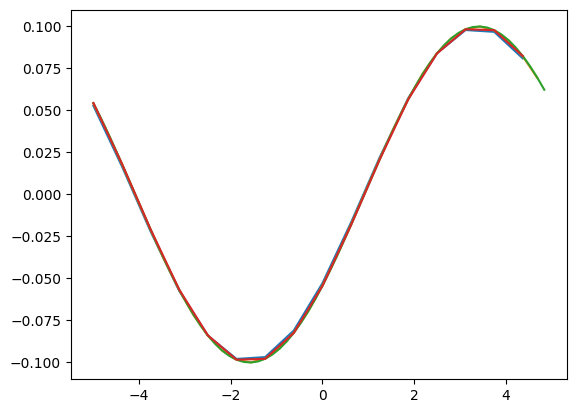

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7fc5f05e0828>

In [7]:
# test
# overlaping plots of the numerical xi and the exact xi for all resolutions

ti=10; yi=1;

plot(xx_16, xi_t_16[ti,:,yi,1])
plot(xx_32, xi_t_32[ti,:,yi,1])
plot(xx_64, xi_t_64[ti,:,yi,1])

plot(xx_16, xi_exact[ti,:,yi,1])

In [8]:
# comparison of the exact and the numerical xi, at the common grid points and time steps of the lowest resolution

xi_exact_16_t = xi_t_16[:,:,:,1] .- xi_exact[:,:,:,1];
xi_exact_32_t = xi_t_32[:,1:2:32,1:2:32,1] .- xi_exact[:,:,:,1];
xi_exact_64_t = xi_t_64[1:1:length(tt_64),1:4:64,1:4:64,1] .-xi_exact[1:1:length(tt_64),:,:,1];

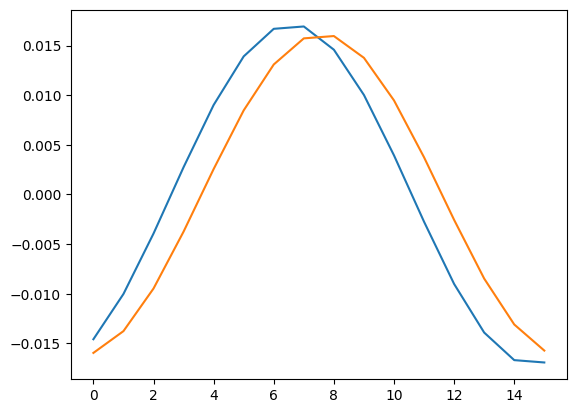

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7fc5f04d4860>

In [9]:
# a pointwise convergence plot for the gauge function xi; it is not included in the paper
# here the comparison is for the coarse and medium resolutions; below for medium and fine

ti=length(tt_16); yi=1;

plot(xi_exact_16_t[ti,:,yi,1])
plot(4*xi_exact_32_t[ti,:,yi,1])

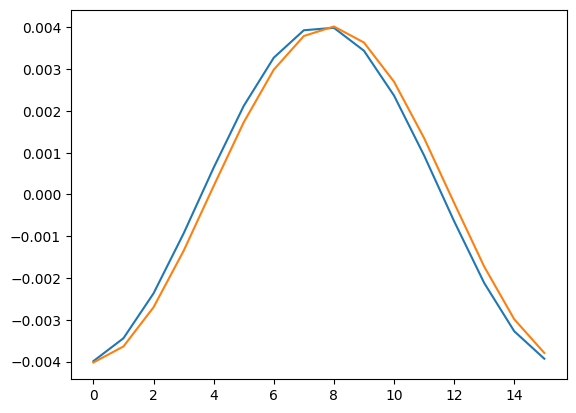

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7fc5f0455160>

In [10]:
ti=length(tt_32); 
yi=1;

plot(xi_exact_32_t[ti,:,yi,1])
plot(4*xi_exact_64_t[ti,:,yi,1])

In [11]:
# the exact form of A in the inner grid
# we work with the regularized A, not the full, because it blows up on the boundary
# a4 is given in the boundary data

a4 = -1.0;

A_exact_c1 = similar(A_t_16_c1[:,:,:,:]);

for i in 1:length(tt_16)
for j in 1:length(uu_16_c1)
for k in 1:length(xx_16)
for l in 1:length(yy_16)  
                
    tt = tt_16[i];    
    uu_c1 = uu_16_c1[j];    
    xx = xx_16[k];    
    xi = amp*sin(0.2*π*(5.0 + vx*tt - xx));            
    A_exact_c1[i,j,k,l] = a4./(1.0 .+ 2*uu_c1*xi .+ uu_c1.^2*xi.^2);

end
end
end
end

In [12]:
# the exact form of A in the outer grids

a4 = -1.0;

A_exact_c2 = similar(A_t_16_c2[:,:,:,:]);
A_exact_c3 = similar(A_t_16_c3[:,:,:,:]);
A_exact_c4 = similar(A_t_16_c4[:,:,:,:]);

for i in 1:length(tt_16)
for j in 1:length(uu_16_c3)
for k in 1:length(xx_16)
            #for l in 1:length(yy_16)  
                
    tt = tt_16[i];
    
    uu_c2 = uu_16_c2[j];
    uu_c3 = uu_16_c3[j];
    uu_c4 = uu_16_c4[j];
    
    xx = xx_16[k];
    
    xi = amp*sin(0.2*π*(5.0 + vx*tt - xx));
            
    A_exact_c2[i,j,k,:] .= 1/uu_c2^2 .+ 2.0*xi/uu_c2 .+ xi.^2 .+  uu_c2.^2*a4./(1.0 .+ 2*uu_c2*xi .+ uu_c2.^2*xi.^2);
    A_exact_c3[i,j,k,:] .= 1/uu_c3^2 .+ 2.0*xi/uu_c3 .+ xi.^2 .+  uu_c3.^2*a4./(1.0 .+ 2*uu_c3*xi .+ uu_c3.^2*xi.^2);
    A_exact_c4[i,j,k,:] .= 1/uu_c4^2 .+ 2.0*xi/uu_c4 .+ xi.^2 .+  uu_c4.^2*a4./(1.0 .+ 2*uu_c4*xi .+ uu_c4.^2*xi.^2);
    
end
end
end

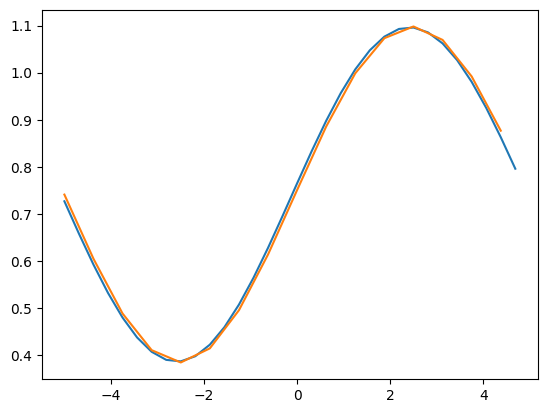

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7fc5d3703940>

In [13]:
# test
# compare the exact A in the 2nd outer grit to the numerical value
# at a fixed timestep, radial coordinate u and transverse coordiante y
# the plot is only along x

ti = length(tt_16); ui = 28; yi = 1;

plot(xx_32, 1.0*A_t_32_c3[ti,ui,:,yi]) # numerical for medium resolution
plot(xx_16, A_exact_c3[ti,ui,:,yi]) #  exact, as a grid function on the points of the coarse resolution

In [14]:
# the difference of the exact A and the numerical for different resolutions and the different grids

A_exact_16_t_c1 = A_t_16_c1[:,:,:,:] .- A_exact_c1[:,:,:,:];
A_exact_32_t_c1 = A_t_32_c1[:,:,1:2:32,1:2:32] .- A_exact_c1[:,:,:,:];
A_exact_64_t_c1 = A_t_64_c1[1:1:length(tt_64),:,1:4:64,1:4:64] .- A_exact_c1[1:1:length(tt_64),:,:,:];

A_exact_16_t_c2 = A_t_16_c2[:,:,:,:] .- A_exact_c2[:,:,:,:];
A_exact_32_t_c2 = A_t_32_c2[:,:,1:2:32,1:2:32] .- A_exact_c2[:,:,:,:];
A_exact_64_t_c2 = A_t_64_c2[1:1:length(tt_64),:,1:4:64,1:4:64] .- A_exact_c2[1:1:length(tt_64),:,:,:];

A_exact_16_t_c3 = A_t_16_c3[:,:,:,:] .- A_exact_c3[:,:,:,:];
A_exact_32_t_c3 = A_t_32_c3[:,:,1:2:32,1:2:32] .- A_exact_c3[:,:,:,:];
A_exact_64_t_c3 = A_t_64_c3[1:1:length(tt_64),:,1:4:64,1:4:64] .- A_exact_c3[1:1:length(tt_64),:,:,:];

A_exact_16_t_c4 = A_t_16_c4[:,:,:,:] .- A_exact_c4[:,:,:,:];
A_exact_32_t_c4 = A_t_32_c4[:,:,1:2:32,1:2:32] .- A_exact_c4[:,:,:,:];
A_exact_64_t_c4 = A_t_64_c4[1:1:length(tt_64),:,1:4:64,1:4:64] .- A_exact_c4[1:1:length(tt_64),:,:,:];

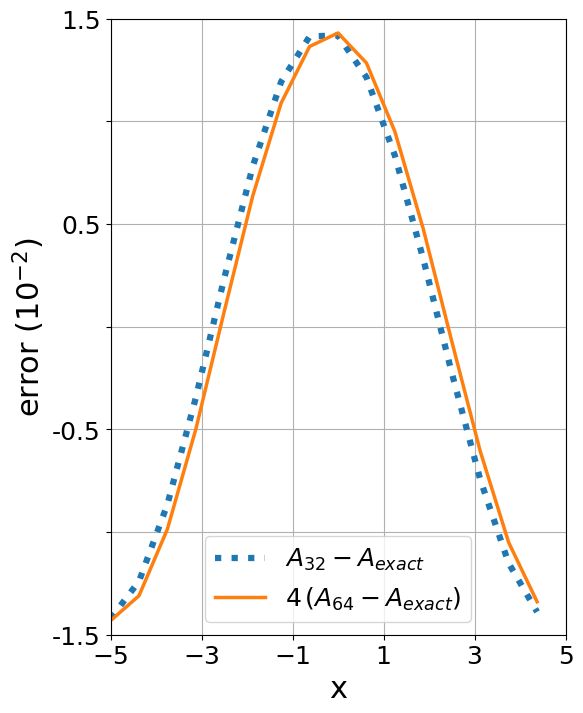

In [15]:
# the pointwise convergence plot of the paper

fig = figure("pyplot_subplot_touching",figsize=(5,7))
subplots_adjust(hspace=0.15, wspace=0.15, top = 0.96, bottom = 0.08, right=0.98, left=0.07)

subplot(111) # Create the 1st axis of a 3x1 array of axes

grid("on")
# x-axis
xlim(-5,5) # Set the x-limits
xticks(-5:2:5,fontsize="18") # Set the x-tick range and step size
xlabel("x", fontsize="22")#fontname="arial" 
ylabel("error "*L"(10^{-2})",fontsize="22")
yticks(-1.5*1e-2:0.5e-2:1.5*1e-2,("-1.5","","-0.5","","0.5","","1.5"),fontsize="18") # Set the y-tick range and step size
ylim(-1.5*1e-2,1.5*1e-2) # Set the y-limit,

#plot
#plot(tt_48, Q1*ones(length(tt_48)), linestyle=":" , linewidth=4.5, 
#    label=L"(h_{48}^4 - h_{64}^4)/(h_{64}^4 - h_{80}^4)")

ti = 99;
ui = 28; 
yi =10;

plot(xx_16, A_exact_32_t_c3[ti,ui,:,yi],   
        linestyle=":", linewidth=4.5,
        label=L"A_{32}-A_{exact}")
plot(xx_16, 4*A_exact_64_t_c3[ti,ui,:,yi],
        linestyle="-", linewidth=2.5,
        label=L"4 \,(A_{64}-A_{exact})" )


legend(fontsize="18",loc=8)

fig.canvas.draw() # Update the figure


In [16]:
# norm convergence
# we build the norms of A, we add the difference of exact A and numerical
# for the different resolutions and grids
# conv_1 is the convergence rate between coarse and medium resolutions
# conv_2 is the same between medium and fine

conv_1 = zeros(length(tt_16));
conv_2 = zeros(length(tt_16));

for i in 1:length(tt_16)
    s16_c1 = sum(A_exact_16_t_c1[i,:,:,:].^2)
    s16_c2 = sum(A_exact_16_t_c2[i,2:1:length(uu_16_c2),:,:].^2)
    s16_c3 = sum(A_exact_16_t_c3[i,2:1:length(uu_16_c2),:,:].^2)
    s16_c4 = sum(A_exact_16_t_c4[i,2:1:length(uu_16_c2),:,:].^2)
    
    s32_c1 = sum(A_exact_32_t_c1[i,:,:,:].^2)
    s32_c2 = sum(A_exact_32_t_c2[i,2:1:length(uu_16_c2),:,:].^2)
    s32_c3 = sum(A_exact_32_t_c3[i,2:1:length(uu_16_c2),:,:].^2)
    s32_c4 = sum(A_exact_32_t_c4[i,2:1:length(uu_16_c2),:,:].^2)
    
    s64_c1 = sum(A_exact_64_t_c1[i,:,:,:].^2)
    s64_c2 = sum(A_exact_64_t_c2[i,2:1:length(uu_16_c2),:,:].^2)
    s64_c3 = sum(A_exact_64_t_c3[i,2:1:length(uu_16_c2),:,:].^2)
    s64_c4 = sum(A_exact_64_t_c4[i,2:1:length(uu_16_c2),:,:].^2)
    
    conv_1[i] = sqrt((s16_c1 + s16_c2 + s16_c3 + s16_c4)/(s32_c1 + s32_c2 + s32_c3 + s32_c4))
    conv_2[i] = sqrt((s32_c1 + s32_c2 + s32_c3 + s32_c4)/(s64_c1 + s64_c2 + s64_c3 + s64_c4))
end

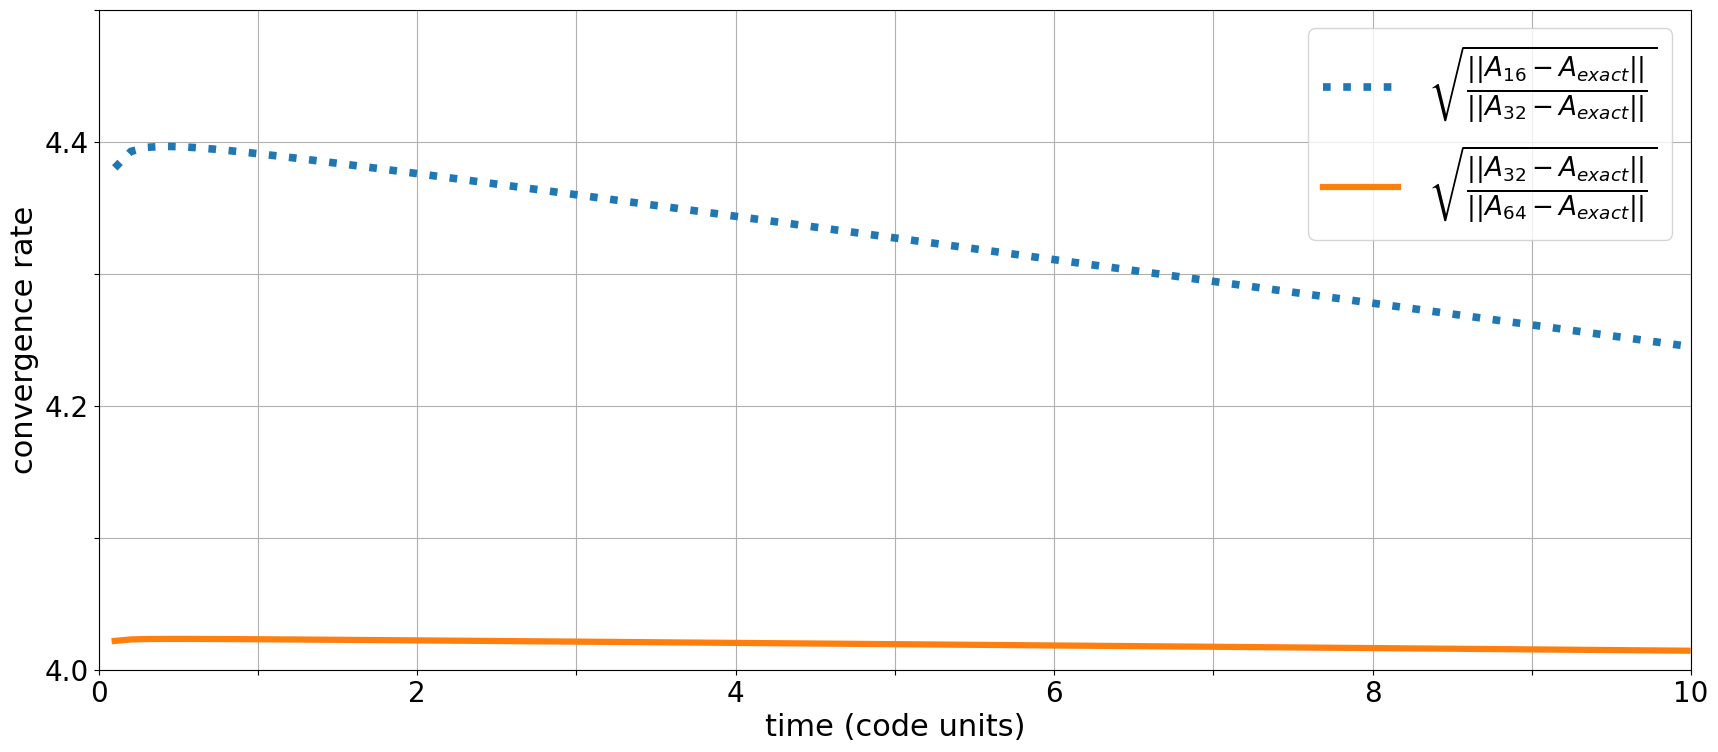

In [17]:
# the norm convergence plot of the paper

fig = figure("pyplot_subplot_touching",figsize=(17.5,7.5))
subplots_adjust(hspace=0.15, wspace=0.15, top = 0.96, bottom = 0.08, right=0.98, left=0.07)

grid("on")

xlim(0,10) # Set the x-limits
xticks(0:1.0:10,("0","","2","","4","","6","","8","","10"),fontsize="20") # Set the x-tick range and step size
xlabel("time (code units)", fontsize="22")#fontname="arial" 

ylabel("convergence rate",fontsize="22")
yticks(4:1.0e-1:4.5,("4.0","","4.2","","4.4",""),fontsize="20") # Set the y-tick range and step size
ylim(4,4.5) # Set the y-limits

#plot

tfi=99

plot(tt_16[2:1:tfi], conv_1[2:1:tfi],
    linestyle=":", linewidth=5.5,
    label=L" \sqrt{ \frac{||A_{16}-A_{exact}||}{||A_{32}-A_{exact}||}}" )
plot(tt_16[2:1:tfi], conv_2[2:1:tfi],
    linestyle="-", linewidth=4.5,
    label=L" \sqrt{ \frac{||A_{32}-A_{exact}||}{||A_{64}-A_{exact}||}}"  )

legend(fontsize="27",loc=1)
#legend(bbox_to_anchor=[1.,1],loc=2,borderaxespad=0.2,fontsize="21")

fig.canvas.draw() # Update the figure


In [18]:
# load the energy density on the boundary

en_t_16   = VEVTimeSeries(dir16, :energy);
en_t_32   = VEVTimeSeries(dir32, :energy);
en_t_64   = VEVTimeSeries(dir64, :energy);

In [19]:
# compare the numerical total boundary energy to the exact
# to test what is the amount of the violation of the total energy conservation of the boundary theory
# for the configuration to exact total energy of the boundary is E_exact=75

en_t_16_err = zeros(length(tt_64))
en_t_32_err = zeros(length(tt_64))
en_t_64_err = zeros(length(tt_64))

for i in 1:length(tt_64)
    en_t_16_err[i] = abs( sum(en_t_16[i,:,:]*hx_16^2) - 75)
    en_t_32_err[i] = abs( sum(en_t_32[i,:,:]*hx_32^2) - 75)
    en_t_64_err[i] = abs( sum(en_t_64[i,:,:]*hx_64^2) - 75)
end

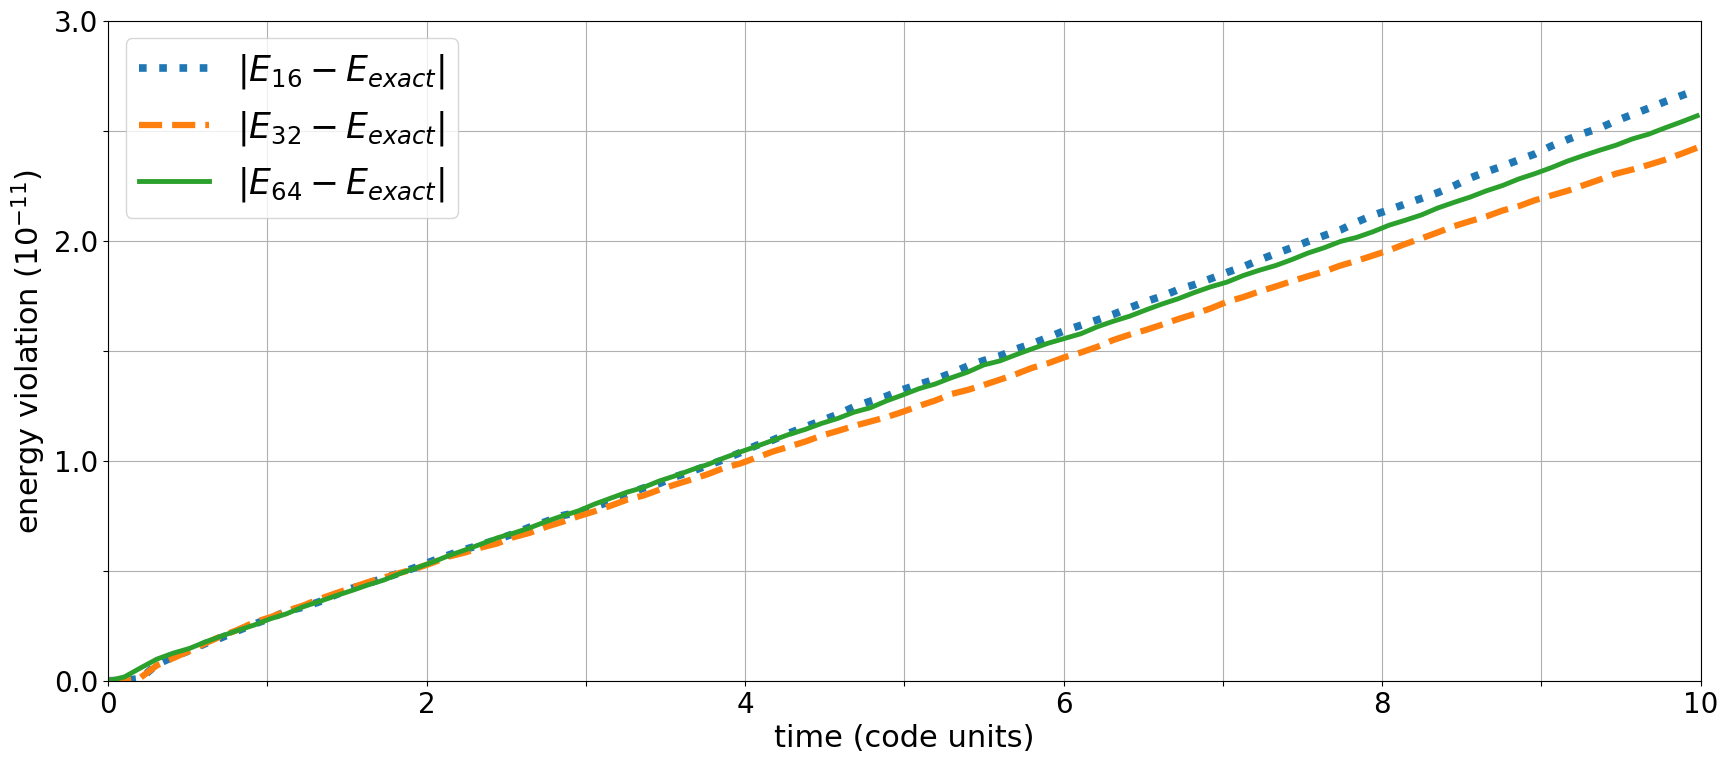

In [20]:
# plot the energy violation of the boundary theory with time

fig = figure("pyplot_subplot_touching",figsize=(17.5,7.5))
subplots_adjust(hspace=0.15, wspace=0.15, top = 0.96, bottom = 0.08, right=0.98, left=0.07)

grid("on")

xlim(0,10) # Set the x-limits
xticks(0:1.0:10,("0","","2","","4","","6","","8","","10"),fontsize="20") # Set the x-tick range and step size
xlabel("time (code units)", fontsize="22")#fontname="arial" 

ylabel("energy violation "*L"(10^{-11})",fontsize="22")
yticks(0.0:0.5e-11:3*10^-11,("0.0","","1.0","","2.0","","3.0"),fontsize="20") # Set the y-tick range and step size
ylim(0,3*10^-11) # Set the y-limits

#plot

plot(tt_64, en_t_16_err,
    linestyle=":", linewidth=5.5,
    label=L"|E_{16}-E_{exact}|" )
plot(tt_64, en_t_32_err,
    linestyle="--", linewidth=4.5,
    label=L"|E_{32}-E_{exact}|")
plot(tt_64, en_t_64_err,
    linestyle="-", linewidth=3.5,
   label=L"|E_{64}-E_{exact}|")

legend(fontsize="25",loc=2)
#legend(bbox_to_anchor=[1.,1],loc=2,borderaxespad=0.2,fontsize="20")

fig.canvas.draw() # Update the figure